## Unsupervised machine learning classification analysis of the Wisconsin Breast Cancer Dataset

### The Objective of Unsupervised Machine Learning Analysis:

The goal of this project is to build unsupervised machine learning (clustering) models to classify breast cancer cases according to characteristics of breast cancer cell nuclei. The predicted classification is compared to the diagnosed result to evaluate whether unsupervised learning can distinguish malignant breast cancer cases from benign cases. The Wisconsin Breast Cancer Dataset was used to train unsupervised clustering models. This dataset was downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The dataset contains a target attribute (diagnosis) and 30 attributes of characteristics of breast cancer cell nuclei. In this project, Principal Component Analysis (PCA) is also conducted to study whether dimensionality reduction can be a strategy to reduce the complexity of features and at the same time to maintain most of their variances, and whether the PCA-transformed dataset with reduced dimensionality can be classified by unsupervised clustering learning as accurate as the dataset with complete dimensionality.


### The description of the dataset:

Attributes in this dataset contain the diagnostic information (the target variable) and features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.

**Attribute Information:**
* id number (patient ID)
* diagnosis (M = malignant, B = benign)
3-32)

**Ten real-valued features are computed for each cell nucleus:**
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.


**An outline of the unsupervised machine learning analysis plan:**
1. The dataset was first examined to check whether there are any missing values in attributes. Missing values will be replaced by median values if they are found.
2. The categorical target variable (diagnosis) is engineered to be a dummy variable.
3. Analysis of data distribution of each characteristic feature and its skewness. Data transformation (e.g., log transformation) is performed when the skewness of the feature data is over 0.75.
4. Scaling is performed before the dataset is used to train unsupervised clustering models.
5. Exploratory data analysis of the correlation between variables.
6. PCA analysis of the dataset is performed and the new dataset with reduced dimensionality is created.
7. The transformed, scaled dataset and PCA-transformed dataset are subjected to clustering learning analysis for unsupervised classification.
8. Clustering models build from different unsupervised ML algorithms are evaluated to identify the best model for the classification of breast cancer outcomes. The PCA-transformed dataset is also evaluated to determine whether it can replace the untransformed dataset.


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
filepath = 'WisconsinCancer.csv'
data = pd.read_csv(filepath, sep=',')

In [3]:
# View the structure of the dataset
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Examine column names
print(len(data.columns))
data.columns

33


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Remove the unnecessary column
data.drop('Unnamed: 32', axis=1, inplace=True)
print(data.shape)
data.columns

(569, 32)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# Count the number of variables with the same data type
data.dtypes.value_counts()

float64    30
int64       1
object      1
dtype: int64

In [7]:
# Examine the data types of variables in the dataset
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Analyze the unique elements in the target variable "diagnosis"
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
# Examine the number of cases for benign and malignant breast cancers
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Remove the "id" variable from the dataset
data.drop('id', axis=1, inplace=True)

In [11]:
# Number of rows
print(data.shape[0])

# Number of columns
print(data.shape[1])

# Column names
print(data.columns.tolist())

569
31
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


**Data Cleaning and Feature Engineering:**

To check whether the dataset contains any missing values, isnull() was used for this analysis.

In [12]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The analysis result shows that there are no missing values present in these 31 attributes.

To convert the categorical target variable to a dummy variable (0 for benign; 1 for malignant), pandas.get_dummies() was used.

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [14]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
print(data.shape)
data.columns

(569, 31)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

The "diagnosis" column was replaced by "diagnosis_M".

In [16]:
# Summarized statistics of the dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# Examine numeric feature variables
data_num = data.drop('diagnosis_M', axis=1)
print(data_num.shape)
data_num.columns

(569, 30)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
data_num.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

**Analysis of skewness of feature data and data transformation:**

To understand the data distribution of each feature, skewness analysis was performed. Skewness analysis (shown below) identified 24 feature variables have skewness > 0.75.

In [19]:
# Analysis of skewness of numeric features
data_num.skew().apply(np.abs)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [20]:
# Identify the feature columns with skewness > 0.75
data.skew().apply(np.abs) > 0.75

radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst       False
symmetry_worst              True
fractal_dimension_worst     True
diagnosis_

In [21]:
# Analysis of how many of feature columns have skewness > 0.75
sum(data.skew().apply(np.abs) > 0.75)

24

In [28]:
data.columns[data.skew().apply(np.abs) > 0.75]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [22]:
# Column names of numeric feature data with skewness > 0.75 are stored in an object named "skewed_vars"
skewed_vars = data.columns[data.skew().apply(np.abs) > 0.75]
print(len(skewed_vars))
skewed_vars

24


Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [23]:
data.shape

(569, 31)

To reduce the skewness of these 24 variables, data transformation was conducted. The data were subjected to log transformation for the reduction of data skewness.

In [24]:
# Make a copy of data and name it as "data2"
data2 = data.copy()

# Perform log transformation on numeric feature data with skewness > 0.75
for col in skewed_vars:
    data2[col] = data2.loc[:, col].apply(np.log1p)   

In [25]:
print(data2.shape)
data2.head()

(569, 31)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,2.943913,10.38,4.818667,6.909753,0.11840,0.244983,0.262441,0.137237,0.2419,0.075766,...,17.33,5.223594,7.610853,0.1622,0.510185,0.537604,0.2654,0.378505,0.112346,1
1,3.071303,17.77,4.897093,7.190676,0.08474,0.075701,0.083330,0.067818,0.1812,0.055122,...,23.41,5.073923,7.579168,0.1238,0.171092,0.216401,0.1860,0.242946,0.085278,1
2,3.029650,21.25,4.875197,7.093405,0.10960,0.148334,0.180153,0.120357,0.2069,0.058259,...,25.53,5.033701,7.444249,0.1444,0.353821,0.371839,0.2430,0.308440,0.083955,1
3,2.519308,20.38,4.364117,5.958683,0.14250,0.249902,0.216240,0.100026,0.2597,0.092980,...,26.50,4.603869,6.343353,0.2098,0.623958,0.522893,0.2575,0.509104,0.159565,1
4,3.058237,14.34,4.913390,7.168580,0.10030,0.124692,0.180653,0.099212,0.1809,0.057165,...,16.67,5.031744,7.362645,0.1374,0.186480,0.336472,0.1625,0.212204,0.073975,1


In [26]:
# Re-analysis of skewness of data2 after log transformation
data2.skew()

radius_mean                0.348744
texture_mean               0.650450
perimeter_mean             0.328800
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           1.043195
concavity_mean             1.206982
concave points_mean        1.083180
symmetry_mean              0.725609
fractal_dimension_mean     1.272294
radius_se                  1.713417
texture_se                 0.629526
perimeter_se               1.025375
area_se                    0.847298
smoothness_se              2.283394
compactness_se             1.816278
concavity_se               4.231738
concave points_se          1.399869
symmetry_se                2.135874
fractal_dimension_se       3.874373
radius_worst               0.506347
texture_worst              0.498321
perimeter_worst            0.462758
area_worst                 0.457614
smoothness_worst           0.415426
compactness_worst          1.048729
concavity_worst            0.717939
concave points_worst       0

In [27]:
# Analysis of how many of feature columns have skewness > 0.75 after log transformation
sum(data2.skew().apply(np.abs) > 0.75)

16

Data transformation significantly reduced the skewness of the feature data and the number of feature variables with skewness > 0.75 decreased from 24 to 16.

**Data scaling and exploratory data analysis:**

Before scaling of numeric variables, numeric feature variables (X) were split from the target variable (y).

In [28]:
# Split the data2 and store the feature data in X and the target data in y
X = data2.drop('diagnosis_M', axis=1)
y = data2.diagnosis_M

# Store column names of X in an object named "cols"
cols = X.columns.tolist()

In [29]:
print(X.shape)
X.head(8)

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.943913,10.38,4.818667,6.909753,0.11840,0.244983,0.262441,0.137237,0.2419,0.075766,...,3.272606,17.33,5.223594,7.610853,0.1622,0.510185,0.537604,0.2654,0.378505,0.112346
1,3.071303,17.77,4.897093,7.190676,0.08474,0.075701,0.083330,0.067818,0.1812,0.055122,...,3.257712,23.41,5.073923,7.579168,0.1238,0.171092,0.216401,0.1860,0.242946,0.085278
2,3.029650,21.25,4.875197,7.093405,0.10960,0.148334,0.180153,0.120357,0.2069,0.058259,...,3.201526,25.53,5.033701,7.444249,0.1444,0.353821,0.371839,0.2430,0.308440,0.083955
3,2.519308,20.38,4.364117,5.958683,0.14250,0.249902,0.216240,0.100026,0.2597,0.092980,...,2.766948,26.50,4.603869,6.343353,0.2098,0.623958,0.522893,0.2575,0.509104,0.159565
4,3.058237,14.34,4.913390,7.168580,0.10030,0.124692,0.180653,0.099212,0.1809,0.057165,...,3.158701,16.67,5.031744,7.362645,0.1374,0.186480,0.336472,0.1625,0.212204,0.073975
5,2.598979,15.70,4.425685,6.169820,0.12780,0.157004,0.146522,0.077785,0.2087,0.073371,...,2.801541,23.75,4.648230,6.610158,0.1791,0.421929,0.428856,0.1741,0.335400,0.117250
6,2.957511,19.98,4.792479,6.947937,0.09463,0.103459,0.106789,0.071390,0.1794,0.055832,...,3.173041,27.66,5.038250,7.382124,0.1442,0.229205,0.320923,0.1932,0.267199,0.080363
7,2.688528,20.83,4.513055,6.361130,0.11890,0.152292,0.089530,0.058127,0.2196,0.071865,...,2.893700,28.14,4.714921,6.800170,0.1654,0.313496,0.237283,0.1556,0.277329,0.108944


The MinMaxScaler( ) function from sklearn.preprocessing was used to scale the numeric dataset (X).

As the output from MinMaxScaler( ) is a numpy array, pandas.DataFrame( ) was used to re-create the X data frame with scaled feature data.

In [30]:
# Perform scaling of X using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.669889,0.022658,0.704853,0.679091,0.593753,0.813663,0.738368,0.748616,0.686364,0.610784,...,0.761425,0.141525,0.807199,0.761908,0.601136,0.695530,0.662222,0.912027,0.640921,0.435400
1,0.768335,0.272574,0.759224,0.777607,0.289880,0.203629,0.234445,0.369938,0.379798,0.144035,...,0.750955,0.303571,0.713090,0.751782,0.347553,0.207492,0.266563,0.639175,0.268206,0.234858
2,0.736146,0.390260,0.744044,0.743495,0.514309,0.465372,0.506852,0.656539,0.509596,0.214963,...,0.711460,0.360075,0.687799,0.708663,0.483590,0.470483,0.458033,0.835052,0.448280,0.225054
3,0.341761,0.360839,0.389719,0.345566,0.811321,0.831389,0.608382,0.545635,0.776263,1.000000,...,0.405974,0.385928,0.417531,0.356830,0.915472,0.859276,0.644100,0.884880,1.000000,0.785235
4,0.758238,0.156578,0.770523,0.769858,0.430351,0.380177,0.508261,0.541191,0.378283,0.190206,...,0.681356,0.123934,0.686569,0.682584,0.437364,0.229639,0.414467,0.558419,0.183681,0.151114


The scaled X dataset was checked by describe( ) to confirm that all of numeric data have been scaled between 0 and 1.

In [31]:
# Analyze summarized statistics of scaled X
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,0.474623,0.171734,0.0,0.358989,0.454460,0.574276,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.484398,0.172163,0.0,0.368123,0.462199,0.591323,1.0
area_mean,569.0,0.488093,0.169126,0.0,0.375255,0.470075,0.592919,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.284509,0.168097,0.0,0.157498,0.250068,0.372534,1.0
concavity_mean,569.0,0.232256,0.197261,0.0,0.081960,0.168022,0.345597,1.0
concave points_mean,569.0,0.256900,0.197838,0.0,0.109679,0.179745,0.389426,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0
fractal_dimension_mean,569.0,0.274276,0.149570,0.0,0.166063,0.248001,0.345342,1.0


In [32]:
X.shape

(569, 30)

To understand the correlations between feature variables, the corr( ) function was used for correlation analysis.

In [33]:
# Perform analysis of correlations between feature variables
corr_mat = X.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.318346,0.998017,0.999465,0.152087,0.492571,0.653618,0.797439,0.128959,-0.345094,...,0.975933,0.299314,0.971613,0.975917,0.105461,0.436392,0.549617,0.741947,0.168476,0.000531
texture_mean,0.318346,0.000000,0.322669,0.319679,-0.023389,0.237095,0.306604,0.293868,0.071401,-0.076457,...,0.348637,0.912045,0.353002,0.347764,0.077503,0.276816,0.302070,0.295316,0.104075,0.118702
perimeter_mean,0.998017,0.322669,0.000000,0.997281,0.188234,0.541800,0.690108,0.823452,0.161561,-0.297124,...,0.976416,0.305471,0.976866,0.976047,0.136902,0.480721,0.587564,0.770810,0.194044,0.046200
area_mean,0.999465,0.319679,0.997281,0.000000,0.140885,0.481178,0.647029,0.789748,0.119882,-0.356358,...,0.977022,0.301981,0.972417,0.978046,0.098204,0.429506,0.545970,0.736811,0.162359,-0.006294
smoothness_mean,0.152087,-0.023389,0.188234,0.140885,0.000000,0.663873,0.524513,0.555805,0.557775,0.585325,...,0.201604,0.036072,0.225814,0.188693,0.805324,0.481421,0.436713,0.503053,0.395056,0.501116
compactness_mean,0.492571,0.237095,0.541800,0.481178,0.663873,0.000000,0.887457,0.834434,0.600340,0.563320,...,0.531776,0.249309,0.583683,0.517857,0.571112,0.878121,0.824687,0.820806,0.506257,0.691042
concavity_mean,0.653618,0.306604,0.690108,0.647029,0.524513,0.887457,0.000000,0.925341,0.498109,0.333889,...,0.678598,0.306762,0.716120,0.670378,0.457063,0.778127,0.894757,0.873077,0.411063,0.523907
concave points_mean,0.797439,0.293868,0.823452,0.789748,0.555805,0.834434,0.925341,0.000000,0.462297,0.167030,...,0.817425,0.294542,0.839650,0.808195,0.456938,0.689409,0.772976,0.914746,0.377154,0.374532
symmetry_mean,0.128959,0.071401,0.161561,0.119882,0.557775,0.600340,0.498109,0.462297,0.000000,0.479810,...,0.173206,0.090651,0.202381,0.161543,0.426675,0.472821,0.425368,0.430297,0.704904,0.439321
fractal_dimension_mean,-0.345094,-0.076457,-0.297124,-0.356358,0.585325,0.563320,0.333889,0.167030,0.479810,0.000000,...,-0.286202,-0.051167,-0.240258,-0.300993,0.505474,0.454654,0.327544,0.175167,0.330029,0.769124


In [34]:
# identify correlated pairs of feature variables
corr_mat.abs().idxmax()

radius_mean                              area_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                           texture_worst
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                        concavity_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                          symmetry_mean
fractal_dimension_se           

In [35]:
corr_mat.abs().max()

radius_mean                0.999465
texture_mean               0.912045
perimeter_mean             0.998017
area_mean                  0.999465
smoothness_mean            0.805324
compactness_mean           0.887457
concavity_mean             0.925341
concave points_mean        0.925341
symmetry_mean              0.704904
fractal_dimension_mean     0.769124
radius_se                  0.960671
texture_se                 0.457216
perimeter_se               0.960671
area_se                    0.951101
smoothness_se              0.428325
compactness_se             0.822292
concavity_se               0.822292
concave points_se          0.784603
symmetry_se                0.449103
fractal_dimension_se       0.802681
radius_worst               0.998996
texture_worst              0.912045
perimeter_worst            0.994359
area_worst                 0.998996
smoothness_worst           0.805324
compactness_worst          0.902511
concavity_worst            0.902511
concave points_worst       0

In [36]:
corr_data = pd.DataFrame(corr_mat.abs().idxmax(), columns=['feature_2']).reset_index().rename(columns={'index':'feature_1'})
corr_data

,feature_1,feature_2
0,radius_mean,area_mean
1,texture_mean,texture_worst
2,perimeter_mean,radius_mean
3,area_mean,radius_mean
4,smoothness_mean,smoothness_worst
5,compactness_mean,concavity_mean
6,concavity_mean,concave points_mean
7,concave points_mean,concavity_mean
8,symmetry_mean,symmetry_worst
9,fractal_dimension_mean,fractal_dimension_worst


In [37]:
corr_data['correlation'] = corr_mat.abs().max().values
corr_data.sort_values(by='correlation', ascending=False).reset_index(drop=True)

,feature_1,feature_2,correlation
0,radius_mean,area_mean,0.999465
1,area_mean,radius_mean,0.999465
2,radius_worst,area_worst,0.998996
3,area_worst,radius_worst,0.998996
4,perimeter_mean,radius_mean,0.998017
5,perimeter_worst,radius_worst,0.994359
6,radius_se,perimeter_se,0.960671
7,perimeter_se,radius_se,0.960671
8,area_se,radius_se,0.951101
9,concavity_mean,concave points_mean,0.925341


The correlation analysis shows that many feature variables are correlated with each other. The later **PCA** analysis would be useful to reduce the dimensionality of this dataset.

To understand which feature variable correlates with breast cancer outcomes, the corrwith() function was used.

In [38]:
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)
correlations

smoothness_se             -0.067163
fractal_dimension_mean    -0.013274
symmetry_se               -0.008045
texture_se                 0.011292
fractal_dimension_se       0.078769
concavity_se               0.273987
compactness_se             0.296425
fractal_dimension_worst    0.324416
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.409618
texture_mean               0.415185
symmetry_worst             0.415900
smoothness_worst           0.421465
texture_worst              0.456903
compactness_mean           0.600909
compactness_worst          0.602957
radius_se                  0.612239
perimeter_se               0.633373
concavity_worst            0.679810
concavity_mean             0.709769
area_se                    0.724995
area_mean                  0.727979
radius_mean                0.727980
perimeter_mean             0.741996
concave points_mean        0.781475
area_worst                 0.784118
radius_worst               0

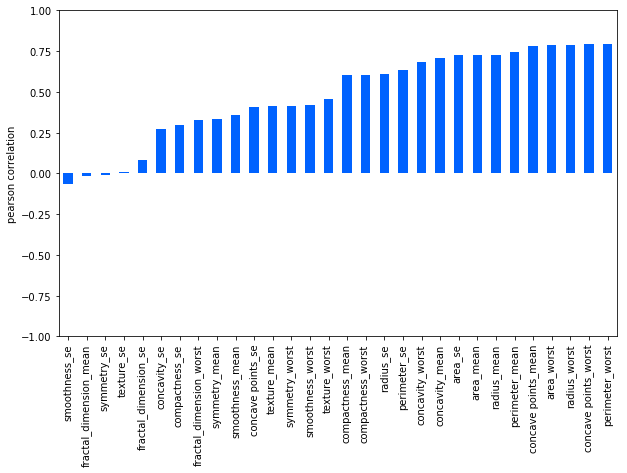

In [39]:
# The correlation was visualized by barplot
ax = correlations.plot(kind='bar', color=colors[0], figsize=(10, 6))
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

The correlation analysis indicates that 15 features (see below) are significantly correlated with breast cancer outcomes in a positive manner (pearson correlation > 0.5).

In [41]:
# Identify feature variables significantly correlate with the target variable
correlations.index[correlations >= 0.5]

Index(['compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'concavity_worst', 'concavity_mean', 'area_se', 'area_mean',
       'radius_mean', 'perimeter_mean', 'concave points_mean', 'area_worst',
       'radius_worst', 'concave points_worst', 'perimeter_worst'],
      dtype='object')

In [42]:
print(X.shape[1])
list(range(1, X.shape[1]+1))

30


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

#### PCA analysis and dimensionality reduction:

To understand whether PCA modeling can be a useful approach to reduce the dimensionality of the dataset and concurrently maintain most of data variances for supervised and unsupervised ML classifications, PCA was conducted as following.

In [43]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, X.shape[1]+1):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    

In [44]:
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,"PCA(copy=True, iterated_power='auto', n_compon...",0.545958
2,"PCA(copy=True, iterated_power='auto', n_compon...",0.714398
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.792012
4,"PCA(copy=True, iterated_power='auto', n_compon...",0.85352
5,"PCA(copy=True, iterated_power='auto', n_compon...",0.891551
6,"PCA(copy=True, iterated_power='auto', n_compon...",0.918746
7,"PCA(copy=True, iterated_power='auto', n_compon...",0.933913
8,"PCA(copy=True, iterated_power='auto', n_compon...",0.945261
9,"PCA(copy=True, iterated_power='auto', n_compon...",0.955019


In [45]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
n,,,,,,,,,,,,,,,,,,,,,
1,0.048708,0.047084,0.053103,0.047372,0.024898,0.043944,0.064206,0.024614,0.072097,0.061283,...,0.055287,0.020028,0.002112,0.022292,0.020448,0.001888,0.018644,0.019087,0.000757,0.022350
2,0.048847,0.041679,0.051425,0.047268,0.030227,0.044046,0.050006,0.024130,0.058129,0.053833,...,0.053111,0.024810,0.008406,0.028046,0.025649,0.008322,0.021552,0.016240,0.005110,0.017758
3,0.045224,0.043072,0.047875,0.043708,0.030496,0.044009,0.045757,0.025189,0.056933,0.049762,...,0.049468,0.023589,0.011921,0.029288,0.024100,0.012573,0.022835,0.020799,0.016311,0.021203
4,0.043064,0.043051,0.045135,0.041809,0.029948,0.044003,0.044704,0.026255,0.054559,0.047766,...,0.046607,0.023702,0.013076,0.029258,0.023976,0.014406,0.023179,0.027242,0.017662,0.030022
5,0.041699,0.042600,0.043795,0.040509,0.032296,0.043760,0.043842,0.027101,0.052585,0.047305,...,0.045291,0.026459,0.013614,0.032397,0.025892,0.014722,0.024613,0.026408,0.017717,0.029484
6,0.040979,0.041876,0.042959,0.039756,0.032012,0.043358,0.043584,0.026989,0.051891,0.046641,...,0.044455,0.027518,0.014890,0.034059,0.028370,0.017234,0.027696,0.025907,0.017708,0.028926
7,0.040694,0.042279,0.042551,0.039246,0.031661,0.043423,0.043710,0.027404,0.051677,0.046687,...,0.044031,0.027543,0.015090,0.033563,0.028267,0.017446,0.027296,0.025730,0.018489,0.028517
8,0.040624,0.042120,0.042111,0.039630,0.031324,0.042998,0.043530,0.027651,0.051618,0.046232,...,0.043604,0.027706,0.015587,0.033824,0.028173,0.017416,0.027393,0.025483,0.018956,0.028226
9,0.040600,0.041857,0.041864,0.039360,0.031707,0.042799,0.043423,0.027380,0.051471,0.046270,...,0.043362,0.027486,0.016499,0.034011,0.028435,0.018101,0.027371,0.025557,0.019231,0.027953


The explained variance of principal components was visualized by the following barplot:

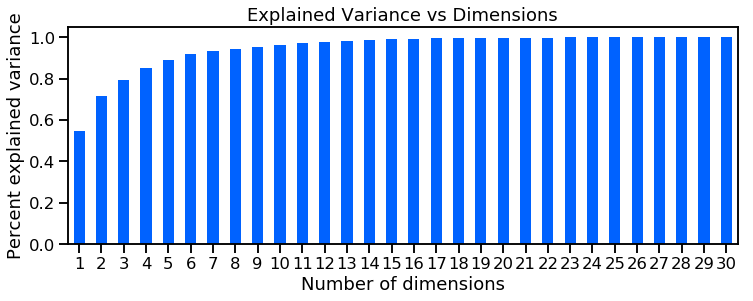

In [46]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar',figsize=(12,4), rot='horizontal')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

According to above analyses, ten principal components are sufficient to represent over 95% of variance of the untransformed dataset.

In [47]:
features_df.iloc[:10,]

features,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
n,,,,,,,,,,,,,,,,,,,,,
1,0.048708,0.047084,0.053103,0.047372,0.024898,0.043944,0.064206,0.024614,0.072097,0.061283,...,0.055287,0.020028,0.002112,0.022292,0.020448,0.001888,0.018644,0.019087,0.000757,0.022350
2,0.048847,0.041679,0.051425,0.047268,0.030227,0.044046,0.050006,0.024130,0.058129,0.053833,...,0.053111,0.024810,0.008406,0.028046,0.025649,0.008322,0.021552,0.016240,0.005110,0.017758
3,0.045224,0.043072,0.047875,0.043708,0.030496,0.044009,0.045757,0.025189,0.056933,0.049762,...,0.049468,0.023589,0.011921,0.029288,0.024100,0.012573,0.022835,0.020799,0.016311,0.021203
4,0.043064,0.043051,0.045135,0.041809,0.029948,0.044003,0.044704,0.026255,0.054559,0.047766,...,0.046607,0.023702,0.013076,0.029258,0.023976,0.014406,0.023179,0.027242,0.017662,0.030022
5,0.041699,0.042600,0.043795,0.040509,0.032296,0.043760,0.043842,0.027101,0.052585,0.047305,...,0.045291,0.026459,0.013614,0.032397,0.025892,0.014722,0.024613,0.026408,0.017717,0.029484
6,0.040979,0.041876,0.042959,0.039756,0.032012,0.043358,0.043584,0.026989,0.051891,0.046641,...,0.044455,0.027518,0.014890,0.034059,0.028370,0.017234,0.027696,0.025907,0.017708,0.028926
7,0.040694,0.042279,0.042551,0.039246,0.031661,0.043423,0.043710,0.027404,0.051677,0.046687,...,0.044031,0.027543,0.015090,0.033563,0.028267,0.017446,0.027296,0.025730,0.018489,0.028517
8,0.040624,0.042120,0.042111,0.039630,0.031324,0.042998,0.043530,0.027651,0.051618,0.046232,...,0.043604,0.027706,0.015587,0.033824,0.028173,0.017416,0.027393,0.025483,0.018956,0.028226
9,0.040600,0.041857,0.041864,0.039360,0.031707,0.042799,0.043423,0.027380,0.051471,0.046270,...,0.043362,0.027486,0.016499,0.034011,0.028435,0.018101,0.027371,0.025557,0.019231,0.027953


In [48]:
# Reduce the dimensionality of X from 30 to 2
PCAmod_n2 = PCA(n_components=2)
PCAmod_n2.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
PCAmod_n2.components_

array([[ 0.23163783,  0.08898069,  0.23904957,  0.22707118,  0.093367  ,
         0.22084206,  0.28569266,  0.29932006,  0.0953256 ,  0.02521968,
         0.15538134,  0.00352802,  0.18861117,  0.21949826, -0.00984603,
         0.11606918,  0.06469849,  0.11474639,  0.00880263,  0.03746429,
         0.25774093,  0.10419011,  0.26200698,  0.2475591 ,  0.1039241 ,
         0.20486119,  0.25301105,  0.3361049 ,  0.08691357,  0.08038192],
       [-0.23884406, -0.03614064, -0.21575448, -0.24019391,  0.19319011,
         0.22883359,  0.14983853,  0.0291861 ,  0.20361518,  0.38941447,
        -0.0522321 ,  0.09068061, -0.03122254, -0.12150336,  0.1360817 ,
         0.22787632,  0.11426963,  0.11030025,  0.13778912,  0.16805203,
        -0.22601007, -0.01717816, -0.1968528 , -0.2253152 ,  0.22365264,
         0.21623513,  0.17841784,  0.07230015,  0.14900889,  0.25453737]])

In [50]:
X_pca_2 = PCAmod_n2.transform(X)
X_pca_2

array([[ 1.48677292,  0.45669204],
       [ 0.54382349, -0.57557856],
       [ 1.05872657, -0.08727538],
       ...,
       [ 0.3389573 , -0.31431525],
       [ 1.69917533,  0.43379067],
       [-1.10930475,  0.0109131 ]])

In [51]:
# Create a data frame with two PCA-transformed features (PC1 and PC2)
X_pca_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
X_pca_2

,PC1,PC2
0,1.486773,0.456692
1,0.543823,-0.575579
2,1.058727,-0.087275
3,0.927593,1.566790
4,0.750699,-0.311808
5,0.390547,0.642969
6,0.563362,-0.365099
7,0.365190,0.339707
8,0.551079,0.617181
9,0.876157,1.199446


**PCA plot** was performed on PC1 and PC2 of first two principal components that represent over 70% of variance.

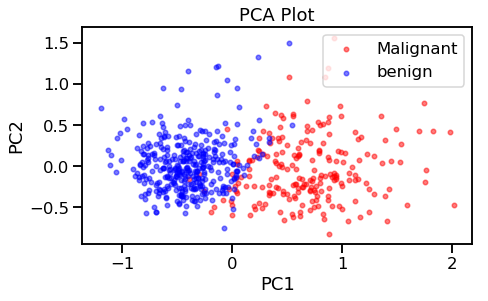

In [52]:
# PCA plot of PC1 and PC2
plt.figure(figsize=(7,4))
plt.scatter(X_pca_2.PC1[y==1], X_pca_2.PC2[y==1], s=20, c='red', alpha=0.5, label='Malignant')
plt.scatter(X_pca_2.PC1[y==0], X_pca_2.PC2[y==0], s=20, c='blue', alpha=0.5, label='benign')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot');

Interestingly, first two principal components can effectively separate malignant breast cancer cases from benign cases.

#### Create a new dataset with 10 dimensions from X using PCA transformation:

In [53]:
PCAmod_n10 = PCA(n_components=10)
PCAmod_n10.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
X_pca_10 = PCAmod_n10.transform(X)
print(X_pca_10.shape)
X_pca_10

(569, 10)


array([[ 1.48677292,  0.45669204, -0.23270192, ..., -0.06852764,
        -0.13184198, -0.16740617],
       [ 0.54382349, -0.57557856, -0.15076614, ..., -0.01242249,
         0.02986172,  0.0092025 ],
       [ 1.05872657, -0.08727538, -0.09143784, ...,  0.06084515,
         0.00911167,  0.08853847],
       ...,
       [ 0.3389573 , -0.31431525,  0.15406926, ...,  0.04402788,
         0.04328401,  0.12453506],
       [ 1.69917533,  0.43379067,  0.03827325, ..., -0.11040988,
        -0.02883311,  0.02557891],
       [-1.10930475,  0.0109131 ,  0.38412133, ...,  0.17070982,
        -0.16862071,  0.07194781]])

In [55]:
cols = ['PC'+str(n) for n in range(1,11)]
cols

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [56]:
X_pca = pd.DataFrame(X_pca_10, columns=cols)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.486773,0.456692,-0.232702,-0.503129,-0.151138,0.173194,-0.218487,-0.068528,-0.131842,-0.167406
1,0.543823,-0.575579,-0.150766,-0.142897,-0.012024,0.011348,-0.059123,-0.012422,0.029862,0.009203
2,1.058727,-0.087275,-0.091438,-0.138011,-0.055216,0.064830,0.040473,0.060845,0.009112,0.088538
3,0.927593,1.566790,-0.214941,0.035681,-0.297474,0.367770,-0.142925,-0.061161,0.208640,-0.116566
4,0.750699,-0.311808,-0.030875,-0.491094,0.025303,-0.168196,0.051429,0.067505,0.027095,0.034388


In [57]:
X_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,569.0,-1.330707e-16,0.632555,-1.190218,-0.475105,-0.178914,0.472189,2.018659
PC2,569.0,7.828206e-17,0.351352,-0.819923,-0.248047,-0.034536,0.181028,1.566790
PC3,569.0,9.755914e-18,0.238499,-0.591917,-0.167434,-0.019591,0.147688,0.776580
PC4,569.0,3.556031e-17,0.212318,-0.851052,-0.143148,-0.011513,0.132818,0.854685
PC5,569.0,-1.926793e-18,0.166952,-0.510536,-0.095495,-0.009877,0.074896,0.752413
PC6,569.0,1.653627e-17,0.141175,-0.482449,-0.090966,-0.014800,0.079280,0.625790
PC7,569.0,6.829140e-18,0.105433,-0.351217,-0.060917,-0.000074,0.066717,0.359549
PC8,569.0,9.804694e-18,0.091197,-0.377589,-0.056945,-0.002627,0.059292,0.509401
PC9,569.0,7.755952e-18,0.084565,-0.325986,-0.044917,-0.001018,0.047004,0.595458
PC10,569.0,2.504831e-17,0.080591,-0.361238,-0.052101,0.001370,0.047817,0.375115


**Use StratifiedShuffleSplit to create train and test datasets with either 10 or 30 dimensions.**

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

# Create the dataframes
X_train = X.iloc[train_idx, :]
X_pca_train = X_pca.iloc[train_idx, :]
y_train = y[train_idx]

X_test  = X.iloc[test_idx, :]
X_pca_test  = X_pca.iloc[test_idx, :]
y_test  = y[test_idx]

In [59]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis_M, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis_M, dtype: float64

To understand whether a reduction to 10 dimensions by PCA is sufficient to represent the original dataset, **logistic regression** modeling (a supervised ML algorithm) was conducted. Classification report and AUC score were used to evaluate the PCA-transformed dataset compared to the untransformed dataset.

In [61]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pca = LogisticRegression(solver='liblinear').fit(X_pca_train, y_train)

In [62]:
y_pred = lr.predict(X_test)
y_pred2 = lr_pca.predict(X_pca_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [64]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [65]:
print('AUC Score for 30 dimensions: ', roc_auc_score(y_test, y_pred))
print('AUC Score for 10 dimensions: ', roc_auc_score(y_test, y_pred2))

AUC Score for 30 dimensions:  0.9609375
AUC Score for 10 dimensions:  0.9609375


Based on above analyses, prediction performances of logistic regression models trained from both PCA-transformed and untransformed datasets are the same.

To determine how many dimensions are sufficient for logistic regression modeling, dimensions from one to ten were analyzed.

In [66]:
roc_auc_scores = []
for n in range(1,11):    
    lr_pca = LogisticRegression(solver='liblinear').fit(X_pca_train.iloc[:,:n], y_train)
    y_pred = lr_pca.predict(X_pca_test.iloc[:,:n])
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

In [67]:
roc_auc_scores

[0.9406396028037384,
 0.9562646028037384,
 0.9562646028037384,
 0.96875,
 0.9609375,
 0.9609375,
 0.9609375,
 0.96875,
 0.9609375,
 0.9609375]

In [68]:
ROC_AUC_Score = pd.DataFrame(roc_auc_scores, columns=['ROC_AUC_Score'])
ROC_AUC_Score['n'] = range(1,11)
ROC_AUC_Score = ROC_AUC_Score.iloc[:, [1,0]]
ROC_AUC_Score

,n,ROC_AUC_Score
0,1,0.940640
1,2,0.956265
2,3,0.956265
3,4,0.968750
4,5,0.960938
5,6,0.960938
6,7,0.960938
7,8,0.968750
8,9,0.960938
9,10,0.960938


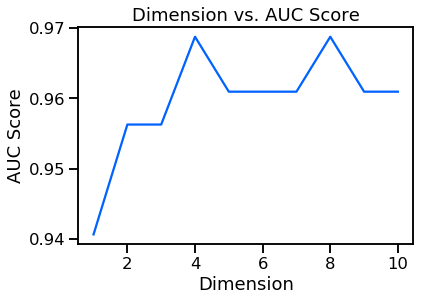

In [69]:
plt.plot(ROC_AUC_Score.n, ROC_AUC_Score.ROC_AUC_Score)
plt.xlabel('Dimension')
plt.ylabel('AUC Score')
plt.title('Dimension vs. AUC Score');

Interestingly, 4 and 8 dimensions are outperformance than 10 dimensions in logistic regression modeling.

### Unsupervised clustering modeling:

#### 1. KMeans Modeling:

Both PCA-transformed (4 dimensions) and untransformed datasets were analyzed by KMeans.

In [71]:
from sklearn.cluster import KMeans

# Perform KMean modeling
km1 = KMeans(n_clusters=2, random_state=42).fit(X)
km2 = KMeans(n_clusters=2, random_state=42).fit(X_pca.iloc[:,:4])

data['kmeans'] = km1.predict(X)
data['PCA_kmeans'] = km2.predict(X_pca.iloc[:,:4])
data.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M,kmeans,PCA_kmeans
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,1,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1,1,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1,1,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1,1,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1,1,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1,1,1


In [72]:
data[['diagnosis_M','kmeans']].groupby(['kmeans','diagnosis_M']).size()

kmeans  diagnosis_M
0       0              346
        1               26
1       0               11
        1              186
dtype: int64

In [73]:
data[['diagnosis_M','PCA_kmeans']].groupby(['PCA_kmeans','diagnosis_M']).size()

PCA_kmeans  diagnosis_M
0           0              346
            1               26
1           0               11
            1              186
dtype: int64

After KMeans models were fitted by both datasets, their predictions of two clusters were compared to the diagnostic outcome (the target variable). Their performances in classification were evaluated by classification report and AUC score.

In [74]:
print(classification_report(data.diagnosis_M, data.kmeans))
print(classification_report(data.diagnosis_M, data.PCA_kmeans))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.94      0.88      0.91       212

    accuracy                           0.93       569
   macro avg       0.94      0.92      0.93       569
weighted avg       0.94      0.93      0.93       569

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.94      0.88      0.91       212

    accuracy                           0.93       569
   macro avg       0.94      0.92      0.93       569
weighted avg       0.94      0.93      0.93       569



In [75]:
print('AUC Score for 30 dimensions (KMeans): ', roc_auc_score(data.diagnosis_M, data.kmeans))
print('AUC Score for 4 dimensions (KMeans): ', roc_auc_score(data.diagnosis_M, data.PCA_kmeans))

AUC Score for 30 dimensions (KMeans):  0.9232730828180328
AUC Score for 4 dimensions (KMeans):  0.9232730828180328


Based on above analyses, the classification performances of KMeans on 4 and 30 dimensions are the same.

#### 2. AgglomerativeClustering Modeling:
Both PCA-transformed (4 dimensions) and untransformed datasets were analyzed by AgglomerativeClustering.

In [76]:
from sklearn.cluster import AgglomerativeClustering

# Perform AgglomerativeClustering modeling
ag1 = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True).fit(X)
ag2 = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True).fit(X_pca.iloc[:,:4])

data['agglom'] = ag1.fit_predict(X)
data['PCA_agglom'] = ag1.fit_predict(X_pca.iloc[:,:4])

In [77]:
data.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M,kmeans,PCA_kmeans,agglom,PCA_agglom
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,1,1,1,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,1,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,1,1,1,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,1,1,1,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,1,1,1,0,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,0.5249,0.5355,0.1741,0.3985,0.12440,1,1,1,0,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,0.2576,0.3784,0.1932,0.3063,0.08368,1,1,1,1,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,0.3682,0.2678,0.1556,0.3196,0.11510,1,1,1,0,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,0.5401,0.5390,0.2060,0.4378,0.10720,1,1,1,0,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,1.0580,1.1050,0.2210,0.4366,0.20750,1,1,1,0,1


In [78]:
data[['diagnosis_M','agglom']].groupby(['agglom','diagnosis_M']).size()

agglom  diagnosis_M
0       0               25
        1              170
1       0              332
        1               42
dtype: int64

In [79]:
data[['diagnosis_M','PCA_agglom']].groupby(['PCA_agglom','diagnosis_M']).size()

PCA_agglom  diagnosis_M
0           0              356
            1               61
1           0                1
            1              151
dtype: int64

In [80]:
data['agglom'] = np.abs(data['agglom']-1)

In [81]:
data[['diagnosis_M','agglom']].groupby(['agglom','diagnosis_M']).size()

agglom  diagnosis_M
0       0              332
        1               42
1       0               25
        1              170
dtype: int64

After AgglomerativeClustering models were fitted by both datasets, their predictions of two clusters were compared to the diagnostic outcome (the target variable). Their performances in classification were evaluated by classification report and AUC score.

In [82]:
print(classification_report(data.diagnosis_M, data.agglom))
print(classification_report(data.diagnosis_M, data.PCA_agglom))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       357
           1       0.87      0.80      0.84       212

    accuracy                           0.88       569
   macro avg       0.88      0.87      0.87       569
weighted avg       0.88      0.88      0.88       569

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       357
           1       0.99      0.71      0.83       212

    accuracy                           0.89       569
   macro avg       0.92      0.85      0.87       569
weighted avg       0.91      0.89      0.89       569



In [83]:
print('AUC Score for 30 dimensions (AgglomerativeClustering): ', roc_auc_score(data.diagnosis_M, data.agglom))
print('AUC Score for 4 dimensions (AgglomerativeClustering): ', roc_auc_score(data.diagnosis_M, data.PCA_agglom))

AUC Score for 30 dimensions (AgglomerativeClustering):  0.8659293906241742
AUC Score for 4 dimensions (AgglomerativeClustering):  0.8547315152476085


Based on above analyses, the classification performance of AgglomerativeClustering on 4 dimensions is very close to that for 30 dimensions.

#### 3. MeanShift Modeling:

Both PCA-transformed (4 dimensions) and untransformed datasets were analyzed by MeanShift.

**Firstly, GridSearchCV was used to identify the best bandwidth for MeanShift Modeling.**

In [84]:
#function to compute silhouette score to be passed into the GridSearchCV scoring
def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    try:
        cluster_labels = estimator.labels_
    except Exception as e:
        cluster_labels=estimator.predict(X)
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

In [91]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'bandwidth': np.arange(0.1,1.2,0.1)}

ms = MeanShift()

gs = GridSearchCV(estimator=ms, param_grid=param_grid, scoring=cv_silhouette_scorer, n_jobs=-1)

In [97]:
gs1 = gs.fit(X)
gs2 = gs.fit(X_pca.iloc[:,:4])

C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Pang-Kuo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [98]:
print(gs1.best_estimator_)
print(gs2.best_estimator_)

MeanShift(bandwidth=0.8, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)
MeanShift(bandwidth=0.8, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)


In [99]:
ms1 = MeanShift(bandwidth=0.8, n_jobs=-1).fit(X)
ms2 = MeanShift(bandwidth=0.8, n_jobs=-1).fit(X_pca.iloc[:,:4])
y_pred = ms1.predict(X)
y_pred2 = ms2.predict(X_pca.iloc[:,:4])

In [100]:
y_pred

array([ 6,  0,  6, 10,  1,  0,  0,  0,  9,  9,  0,  0,  5,  0,  9,  9,  0,
        6,  2,  0,  0,  0,  6,  0,  6,  6,  9,  0,  6,  0,  6,  9,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
       12,  0,  0,  8,  6,  0,  0,  0,  0,  6,  4,  0,  0,  0,  2,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  8,  0,  0,  0,  0,  0,  6,
        0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0, 12, 11,
        0,  0,  0,  5,  0,  0,  0,  0,  1,  6,  0,  6,  0,  0,  0,  6,  0,
        0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  2,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  9,
        0,  0,  0,  0,  0,  0,  6,  0,  1,  7,  0,  0,  0,  0,  6,  6,  0,
        0,  0,  0,  0,  0

In [101]:
y_predict = []
for n in y_pred:
    if n > 0:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [102]:
pd.Series(y_predict).value_counts()

0    458
1    111
dtype: int64

In [103]:
y_pred2

array([1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [104]:
y_predict2 = []
for n in y_pred2:
    if n > 0:
        y_predict2.append(1)
    else:
        y_predict2.append(0)

In [105]:
pd.Series(y_predict2).value_counts()

0    504
1     65
dtype: int64

In [106]:
data['MeanShift'] = y_predict
data['PCA_MeanShift'] = y_predict2
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M,kmeans,PCA_kmeans,agglom,PCA_agglom,MeanShift,PCA_MeanShift
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.2654,0.4601,0.11890,1,1,1,1,1,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,1,1,1,1,0,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,1,1,1,1,1,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2575,0.6638,0.17300,1,1,1,1,1,1,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1625,0.2364,0.07678,1,1,1,1,0,1,1


After MeanShift models were fitted by both datasets, their predictions of two clusters were compared to the diagnostic outcome (the target variable). Their performances in classification were evaluated by classification report and AUC score.

In [107]:
print(classification_report(data.diagnosis_M, data.MeanShift))
print(classification_report(data.diagnosis_M, data.PCA_MeanShift))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       357
           1       0.89      0.47      0.61       212

    accuracy                           0.78       569
   macro avg       0.82      0.72      0.73       569
weighted avg       0.80      0.78      0.76       569

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       357
           1       0.91      0.28      0.43       212

    accuracy                           0.72       569
   macro avg       0.80      0.63      0.62       569
weighted avg       0.78      0.72      0.67       569



In [108]:
print('AUC Score for 30 dimensions (MeanShift): ', roc_auc_score(data.diagnosis_M, data.MeanShift))
print('AUC Score for 4 dimensions (MeanShift): ', roc_auc_score(data.diagnosis_M, data.PCA_MeanShift))

AUC Score for 30 dimensions (MeanShift):  0.7166838433486602
AUC Score for 4 dimensions (MeanShift):  0.6307475820516885


**Another method is to use estimate_bandwidth() to identify bandwidth.**

In [109]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth_1 = estimate_bandwidth(X, quantile=0.2, n_samples=100)
bandwidth_2 = estimate_bandwidth(X_pca.iloc[:,:4], quantile=0.2, n_samples=100)
ms1 = MeanShift(bandwidth=bandwidth_1, n_jobs=-1).fit(X)
ms2 = MeanShift(bandwidth=bandwidth_2, n_jobs=-1).fit(X_pca.iloc[:,:4])
y_pred = ms1.predict(X)
y_pred2 = ms2.predict(X_pca.iloc[:,:4])

In [110]:
y_pred

array([ 7,  0,  7, 11,  2,  1,  0,  0, 10, 10,  0,  0,  6,  0, 10, 10,  0,
        7,  3,  0,  0,  0,  7,  0,  7,  7, 10,  0,  7,  0,  7, 10,  7,  7,
        0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  7,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,
       13,  0,  0,  1,  7,  0,  0,  0,  0,  7,  5,  0,  0,  0,  3,  6,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  4,  0,  0,  0,  9,  0,  0,  0,  0,  0,  7,
        0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  9,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  1, 12,
        0,  0,  0,  6,  0,  0,  0,  0,  2,  7,  0,  7,  0,  0,  0,  7,  0,
        0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  3,  7,  0,  0,  0,  0,  0,
        0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7, 10,
        0,  0,  0,  0,  0,  0,  7,  0,  2,  8,  0,  0,  0,  0,  7,  7,  0,
        0,  0,  0,  0,  0

In [111]:
y_predict = []
for n in y_pred:
    if n > 0:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [112]:
pd.Series(y_predict).value_counts()

0    453
1    116
dtype: int64

In [113]:
y_predict2 = []
for n in y_pred2:
    if n > 0:
        y_predict2.append(1)
    else:
        y_predict2.append(0)

In [114]:
pd.Series(y_predict2).value_counts()

0    481
1     88
dtype: int64

In [115]:
data['MeanShift'] = y_predict
data['PCA_MeanShift'] = y_predict2
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M,kmeans,PCA_kmeans,agglom,PCA_agglom,MeanShift,PCA_MeanShift
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.2654,0.4601,0.11890,1,1,1,1,1,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,1,1,1,1,0,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,1,1,1,1,1,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2575,0.6638,0.17300,1,1,1,1,1,1,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1625,0.2364,0.07678,1,1,1,1,0,1,1


After MeanShift models were fitted by both datasets, their predictions of two clusters were compared to the diagnostic outcome (the target variable). Their performances in classification were evaluated by classification report and AUC score.

In [116]:
print(classification_report(data.diagnosis_M, data.MeanShift))
print(classification_report(data.diagnosis_M, data.PCA_MeanShift))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       357
           1       0.87      0.48      0.62       212

    accuracy                           0.78       569
   macro avg       0.81      0.72      0.73       569
weighted avg       0.80      0.78      0.76       569

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       357
           1       0.92      0.38      0.54       212

    accuracy                           0.76       569
   macro avg       0.82      0.68      0.69       569
weighted avg       0.80      0.76      0.73       569



In [117]:
print('AUC Score for 30 dimensions (MeanShift): ', roc_auc_score(data.diagnosis_M, data.MeanShift))
print('AUC Score for 4 dimensions (MeanShift): ', roc_auc_score(data.diagnosis_M, data.PCA_MeanShift))

AUC Score for 30 dimensions (MeanShift):  0.7171991438084667
AUC Score for 4 dimensions (MeanShift):  0.6812338142804292


The above analyses indicate that estimate_bandwidth is a better method to identify the best bandwidth.

Based on above analyses, the classification performance of MeanShift on 4 dimensions is very close to that for 30 dimensions.

### Conclusion:

Three different types of unsupervised clustering algorithms (KMeans, AgglomerativeClustering and MeanShift) were trained and used to classify breast cancer cases using the Wisconsin Breast Cancer Dataset. According to analyses of accuracy, precision, recall, f1 score and AUC score of predictions from these trained unsupervised ML models, the KMeans-based ML model provides the best classification of breast cancer outcomes (accuracy = 0.93, precision = 0.94, recall/sensitivity = 0.93, f1 score = 0.93, weighted averages; AUC score = 0.92). Therefore, KMeans is the recommended unsupervised ML algorithm for the classification of breast cancer outcomes according to characteristics of breast cancer cell nuclei.

### Summary Key Findings and Insights:

1. Based on EDA, many feature variables in the Wisconsin Breast Cancer Dataset are highly correlated with each other. This finding suggests that this dataset has significant redundancy in feature variables. Due to this finding, PCA was conducted to reduce the dimensionality of this dataset.

2. It is important to find that 4 dimensions of the PCA-transformed dataset is sufficient for supervised and unsupervised ML modeling. This finding indicates that PCA can be a useful approach to significantly reduce dimensionality of the dataset for machine learning analysis. This approach can significantly reduce the computational time during ML modeling and may help to improve the performance of ML algorithms.

3. Among three different unsupervised clustering algorithms, KMeans is outperformance than AgglomerativeClustering and MeanShift. It is obvious that both benign and malignant clusters have different densities. This suggests that KMeans has better performance in dealing with clusters with different densities. In contrast, MeanShift has the poorest performance in dealing with clusters with different densities.

### Suggestions for Next Steps:

1. Although the standard PCA provides excellent dimensionality reduction for the Wisconsin Breast Cancer Dataset, Kernel PCA can be tested to see whether it can provide better dimensionality reduction for this dataset. 
2. Other dimensionality reduction algorithms (e.g., Multi-Dimensional Scaling (MDS), Isomap, TSNE, etc) can also be tested on this dataset in comparison to PCA.
3. Although unsupervised clustering algorithms were used to classify breast cancer outcomes in this project, their classifications can be used as a new feature for this dataset, which may improve the prediction performances of supervised ML algorithms.